<a href="https://colab.research.google.com/github/suryateja1706/AIML-projects-and-labs/blob/main/Copy_of_AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

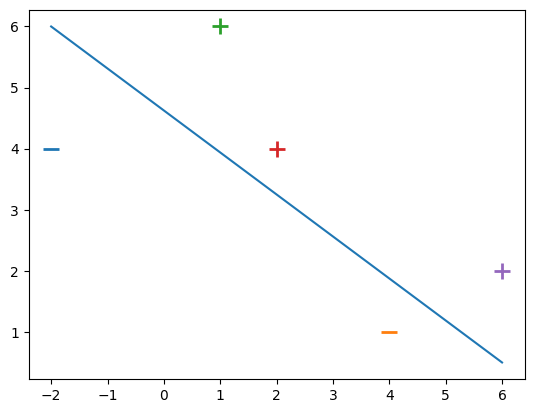

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

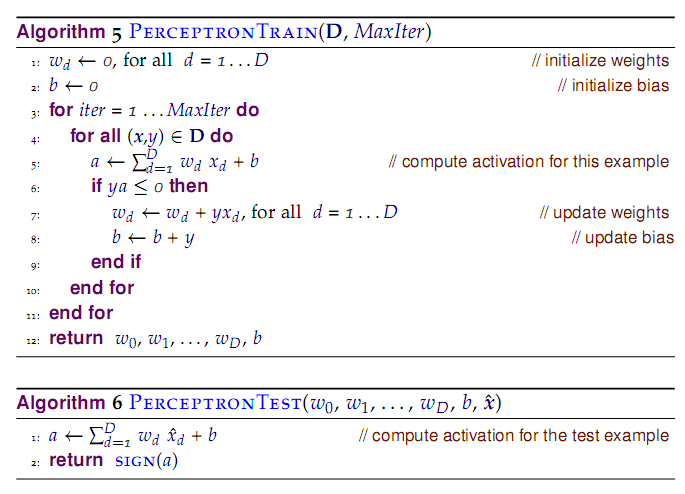

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

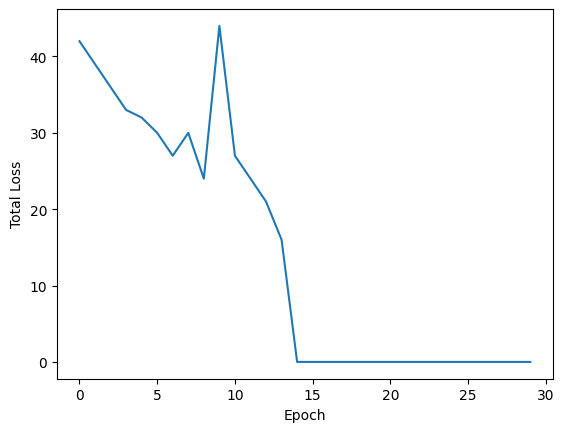

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

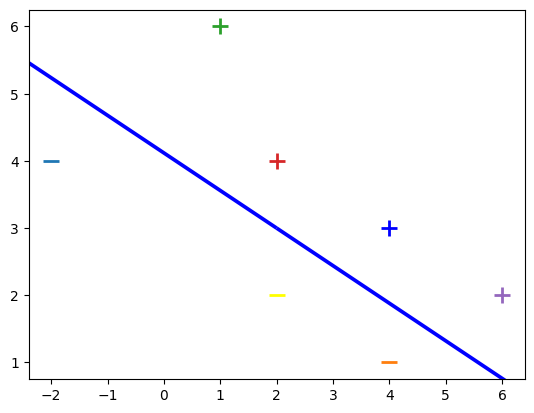

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



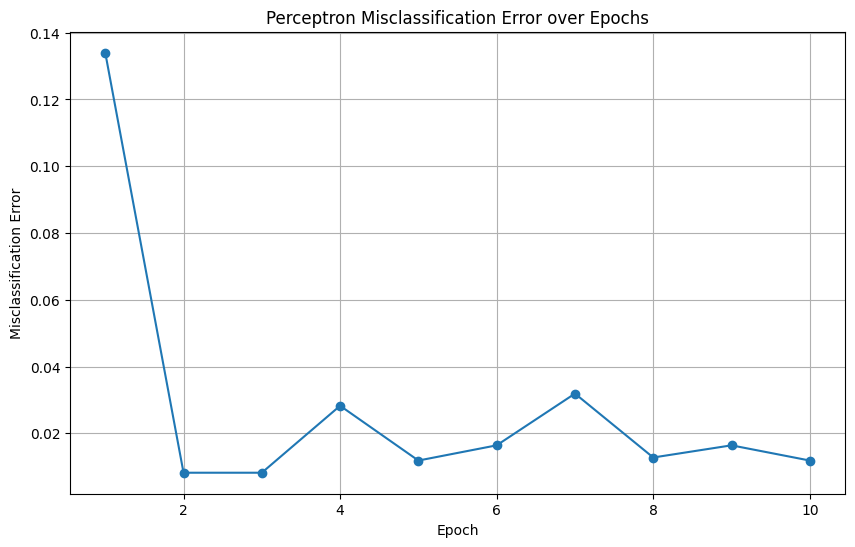

Test Accuracy: 0.98


In [11]:
#!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(url, names=columns)

# Split into features and target
X = data[['variance', 'skewness', 'curtosis', 'entropy']].values
y = data['class'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Perceptron model
model = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

# Track errors to visualize the error plot
errors = []
for _ in range(10):  # Number of epochs
    model.partial_fit(X_train, y_train, classes=np.unique(y))
    y_pred = model.predict(X_train)
    errors.append(1 - accuracy_score(y_train, y_pred))  # Track the misclassification error rate

# Plot the error rate over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Misclassification Error')
plt.title('Perceptron Misclassification Error over Epochs')
plt.grid()
plt.show()

# Evaluate on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Learning Rate: 0.0001 | Converged at epoch: 3
Learning Rate: 0.01 | Converged at epoch: 3
Learning Rate: 0.1 | Converged at epoch: 3
Learning Rate: 1 | Converged at epoch: 3
Learning Rate: 10 | Converged at epoch: 3


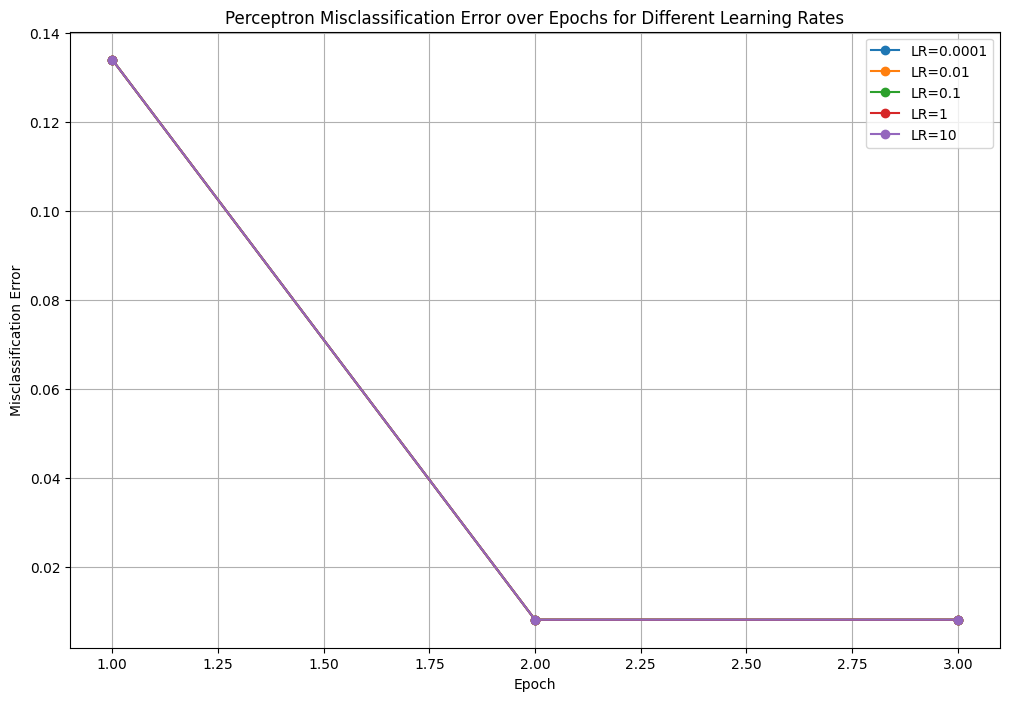

In [12]:
#2


# Split into features and target
X = data[['variance', 'skewness', 'curtosis', 'entropy']].values
y = data['class'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Experiment with different learning rates
learning_rates = [0.0001, 0.01, 0.1, 1, 10]  # Range of learning rates
epochs = 10

# Plot setup
plt.figure(figsize=(12, 8))

for eta in learning_rates:
    # Initialize the Perceptron model
    model = Perceptron(max_iter=1, eta0=eta, random_state=42, warm_start=True)

    errors = []
    converged = False
    for epoch in range(epochs):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        errors.append(1 - accuracy_score(y_train, y_pred))  # Misclassification error

        # Check if the model has converged (error stops decreasing significantly)
        if len(errors) > 1 and np.isclose(errors[-1], errors[-2], atol=1e-5):
            converged = True
            print(f"Learning Rate: {eta} | Converged at epoch: {epoch + 1}")
            break

    if not converged:
        print(f"Learning Rate: {eta} | Did not converge within {epochs} epochs")

    # Plot the errors for each learning rate
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label=f'LR={eta}')

plt.xlabel('Epoch')
plt.ylabel('Misclassification Error')
plt.title('Perceptron Misclassification Error over Epochs for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()


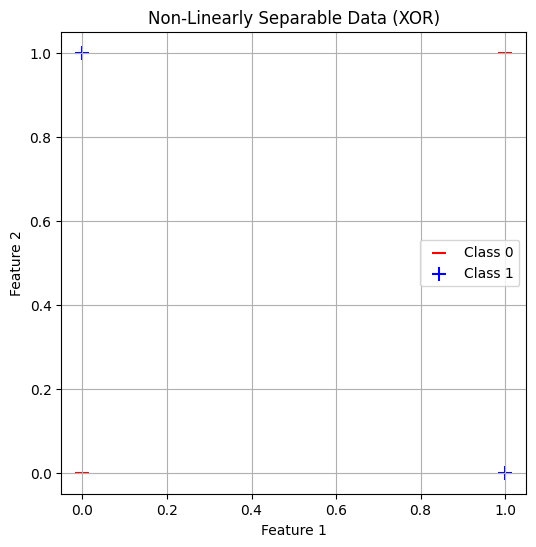

Accuracy: 0.50
Weights: [[0. 0.]]
Bias: [0.]


<ipython-input-16-8adab860779c>:42: RuntimeWarning: invalid value encountered in divide
  y_values = -(model.coef_[0][0] * x_values + model.intercept_) / model.coef_[0][1]


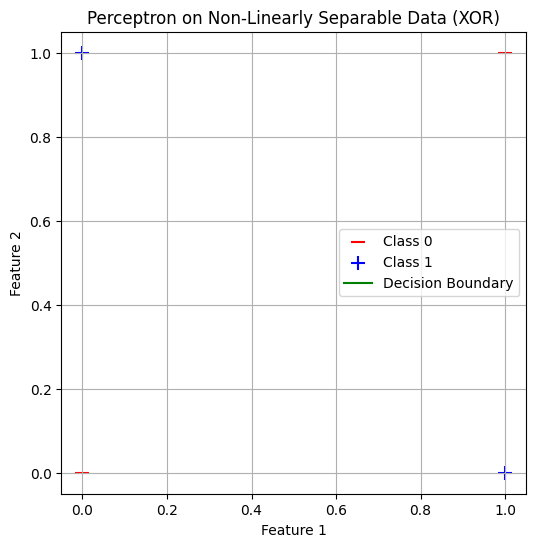

In [16]:
#3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate a toy dataset that is not linearly separable (XOR problem)
# Features and labels
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR labels

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='_', s=100, label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='+', s=100, label='Class 1')
plt.title('Non-Linearly Separable Data (XOR)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Initialize the Perceptron model
model = Perceptron(max_iter=10, eta0=0.1, random_state=42)

# Train the Perceptron model
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Evaluate the performance
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Check the weights and bias
print(f'Weights: {model.coef_}')
print(f'Bias: {model.intercept_}')

# Plot decision boundary (if any)
x_values = np.linspace(0, 1, 100)
y_values = -(model.coef_[0][0] * x_values + model.intercept_) / model.coef_[0][1]

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='_', s=100, label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='+', s=100, label='Class 1')
plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.title('Perceptron on Non-Linearly Separable Data (XOR)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


In [13]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [14]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


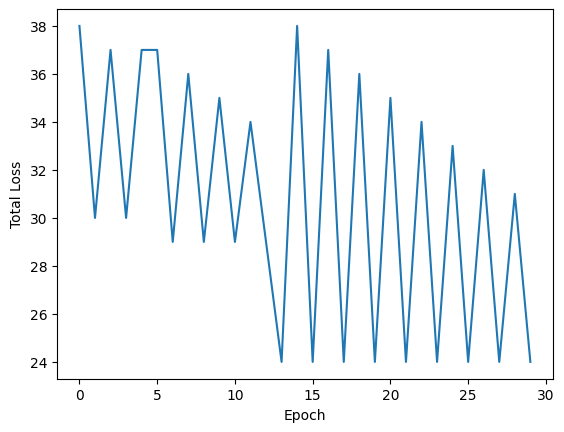

In [15]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

#1
i) Is This Dataset Learnable by a Perceptron?
Yes, this dataset is learnable by a Perceptron because it is linearly separable. The Perceptron algorithm can find a linear decision boundary to separate the positive class (+) from the negative class (-) since all - examples (0,0), (0,1), and (1,0) lie on one side of the decision boundary, and the single + example (1,1) lies on the other side.

ii) Weights Update Procedure
The Perceptron algorithm updates weights using the following rule:

Update Rule:
𝑤=𝑤+𝜂
After a few iterations, the Perceptron will find the correct weights that linearly separate the data points, converging with:

Final weights:
𝑤=[4,2]
w=[4,2]
Final bias: 𝑏=0
b=0
This shows that the dataset is learnable by the Perceptron, which adjusts its weights correctly to classify the points according to the AND function.


#2
Total Boolean Functions and Perceptron Learnability
For any 2-bit binary input
(
𝑥
1
,
𝑥
2
)
∈
{
0
,
1
}
×
{
0
,
1
}
(x
1
​
 ,x
2
​
 )∈{0,1}×{0,1}, there are
2
4
=
16
2
4
 =16 possible Boolean functions, since each function assigns either
+
+ or
−
− to each of the 4 input combinations:

(
0
,
0
)
(0,0)
(
0
,
1
)
(0,1)
(
1
,
0
)
(1,0)
(
1
,
1
)
(1,1)
A Perceptron can learn a Boolean function if and only if the function is linearly separable. Linear separability means that the positive and negative classes can be divided by a single straight line (or hyperplane in higher dimensions).

Functions Learnable by a Perceptron
The Perceptron can learn functions that have outputs that can be separated into two classes by a straight line. This includes:

Constant Functions:

All outputs are
+
+ (positive class for all inputs).
All outputs are
−
− (negative class for all inputs).
Single-Variable Functions:

Functions dependent on a single variable (like
𝑥
1
x
1
​
  or
𝑥
2
x
2
​
 ), where the output only changes with one variable, e.g.,
𝑥
1
 OR
𝑥
2
x
1
​
  OR x
2
​
 .
Basic Logical Functions:

AND, OR, and simple linear combinations of variables where inputs that have a relationship can be linearly separated.
Non-Learnable Functions (Not Linearly Separable)
There are 6 functions among the 16 that are not linearly separable, typically involving XOR-like relationships where the output cannot be separated by a straight line. The specific functions are:

XOR Function:

Output is
+
+ if
𝑥
1
≠
𝑥
2
x
1
​


=x
2
​
 , otherwise
−
−.
𝑥
1
x
1
​

𝑥
2
x
2
​
 	Output
0	0	-
0	1	+
1	0	+
1	1	-
XNOR Function:

Output is
+
+ if
𝑥
1
=
𝑥
2
x
1
​
 =x
2
​
 , otherwise
−
−.
𝑥
1
x
1
​

𝑥
2
x
2
​
 	Output
0	0	+
0	1	-
1	0	-
1	1	+
Functions with Alternating Outputs:

Where there’s no clear line of separation due to alternating positive and negative outputs across variable transitions.
Out of the 16 possible Boolean functions over a 2-bit binary input, 10 are learnable by a Perceptron, while 6 are not, primarily due to non-linear separability, such as XOR and similar patterns that require more complex decision boundaries.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.